In [79]:
from prepare import crop_and_resize
from video_input import VideoInput
from model_state import ModelState
from constants import ModelConstants
from fill_model_msg import get_leads
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from vars import basedir
import numpy as np
import cv2

In [99]:

def visual_model(model_output, image= None):
    clear_output(wait=True)
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    # axs[0].plot(x, np.sin(x))
    # axs[0].set_title('Sine')
    
    # axs[1].plot(x, np.cos(x))
    # axs[1].set_title('Cosine')
    
    # plt.show()
    if image is not None:
        axs[0].imshow(image)
        # plt.figure()
        # plt.imshow(image)
        # plt.axis('off')
        # plt.show()
        
    plt.figure()
    x = range(33)
    
    lane_lines = model_output["lane_lines"]
    for i in range(4):
        axs[1].plot(x, -lane_lines[0,i,:,0], color='green')

    road_edges = model_output["road_edges"]
    for i in range(2):
        axs[1].plot(x, -road_edges[0,i,:,0], color='red')
    
    plan = model_output["plan"]
    axs[1].plot(x, -plan[0,:,0], color="blue")
    
    plt.show()

In [ ]:
vec_desire = np.zeros(ModelConstants.DESIRE_LEN, dtype=np.float16)
# TODO: implement desire later
vec_desire[0] = 1 # None

traffic_convention = np.zeros(2)
traffic_convention[0] = 1 # driver left hand  0=1, right hand 1=1

steer_delay = 0.1 + 0.3 # mazda = 0.1 + 0.2 extra delay
v_ego = 8.7 # m/s
lateral_control_params = np.array([v_ego, steer_delay], dtype=np.float16)

inputs:dict[str, np.ndarray] = {
    'desire': vec_desire,
    'traffic_convention': traffic_convention,
    'lateral_control_params': lateral_control_params,
}


In [122]:
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212352.mp4"


# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250610225126.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250612223313.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250612223324.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250612223342.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250612223442.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250612223502.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212324.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212335.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212342.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212352.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212405.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212413.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212419.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212425.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212535.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212540.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/VID20250613212545.mp4"
# video_path = "/home/heqichen/workspace/reosurces/videos/WIN_20250610_22_52_55_Pro.mp4"
video_path = "/home/heqichen/workspace/reosurces/videos/VID20250621184821.mp4"
# Init
vi = VideoInput(video_path)
model = ModelState()

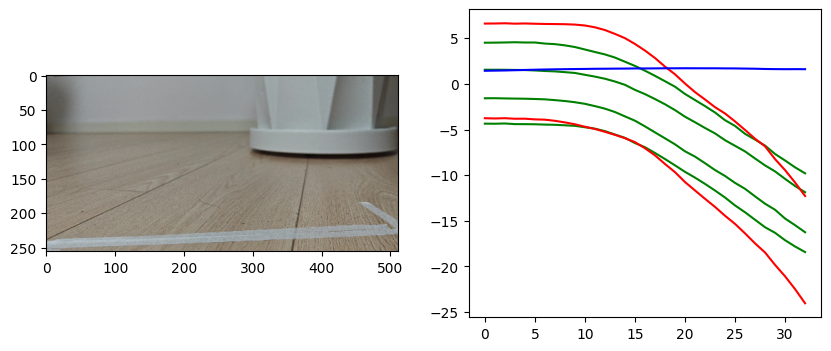

<Figure size 640x480 with 0 Axes>

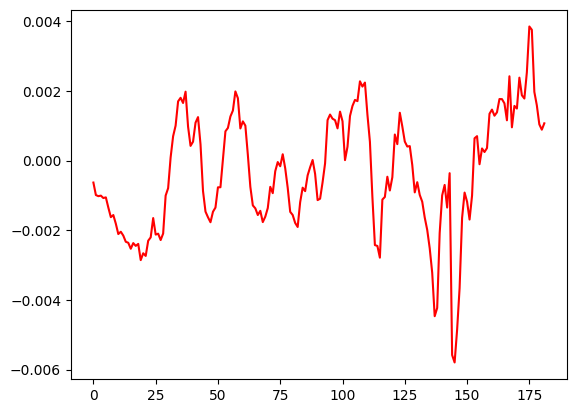

In [123]:
init_pos = []
desired = []

while True:
    try:
        frame_rgb = vi.capture()
        resized_frame_rgb = crop_and_resize(frame_rgb, 512, 256, False)
        model_output = model.run(resized_frame_rgb, inputs)
        
        visual_model(model_output, resized_frame_rgb)
    
        init_pos.append(model_output["plan"][0][0][0])
        desired.append(model_output["desired_curvature"][0][0])
    except:
        break
plt.figure()
# plt.plot(range(len(init_pos)), init_pos, color="green")
plt.plot(range(len(desired)), desired, color="red")
plt.show()

In [82]:

frame_rgb = vi.capture()
resized_frame_rgb = crop_and_resize(frame_rgb, 512, 256, True)

plt.imshow(resized_frame_rgb)
plt.axis('off')
plt.show()

model_output = model.run(resized_frame_rgb, inputs)
print(model_output["lane_lines"].shape)


TypeError: exceptions must derive from BaseException

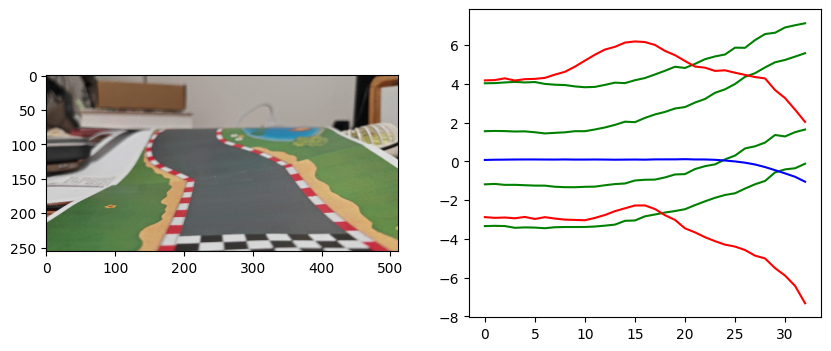

<Figure size 640x480 with 0 Axes>

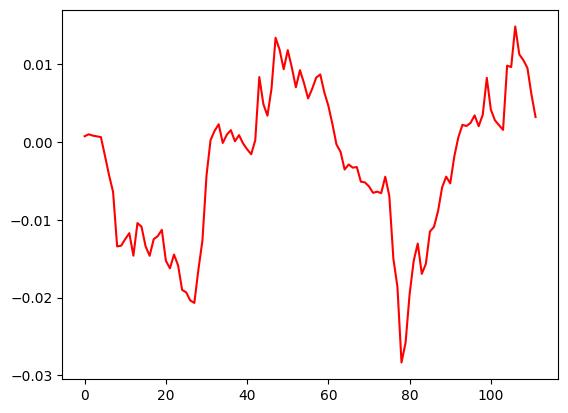

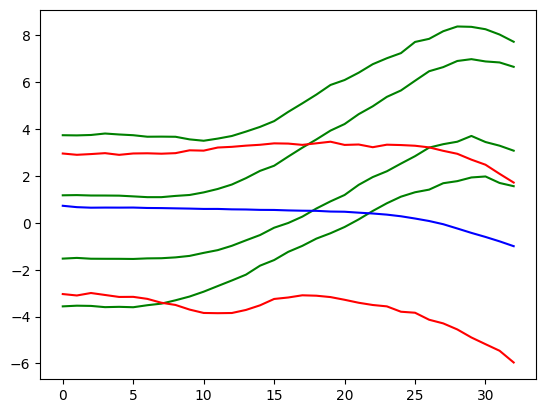

In [68]:

    
visual_model(model_output)



In [88]:
print(model_output.keys())
print(model_output["desired_curvature"].shape)
print(model_output["plan"][0,:,0])
print(model_output["plan"][0,:,1])
print(model_output["plan"][0,:,2])
print(model_output["plan"][0,:,5])

dict_keys(['meta', 'desire_pred', 'pose', 'wide_from_device_euler', 'road_transform', 'hidden_state', 'pad', 'pose_stds', 'wide_from_device_euler_stds', 'road_transform_stds', 'plan', 'lane_lines', 'lane_lines_prob', 'road_edges', 'lead', 'lead_prob', 'desire_state', 'sim_pose', 'desired_curvature', 'plan_weights', 'plan_hypotheses', 'plan_stds_hypotheses', 'plan_stds', 'lane_lines_stds', 'road_edges_stds', 'sim_pose_stds', 'lead_weights', 'lead_hypotheses', 'lead_stds_hypotheses', 'lead_stds', 'desired_curvature_stds'])
(1, 1)
[-0.07214  -0.08374  -0.08795  -0.09406  -0.09717  -0.0967   -0.0937
 -0.09186  -0.098    -0.0908   -0.0916   -0.0957   -0.0911   -0.0847
 -0.089    -0.0932   -0.0869   -0.10034  -0.1018   -0.10156  -0.1126
 -0.0972   -0.0964   -0.0788   -0.04327   0.004765  0.0686    0.1622
  0.2944    0.456     0.621     0.797     1.05    ]
[0.0667  0.0664  0.06824 0.07214 0.0769  0.07874 0.0829  0.08435 0.0884
 0.091   0.0944  0.09875 0.099   0.1002  0.1016  0.1025  0.10297 0